<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>Projeto I</center>
<center>ALUNO: Nicolas Lohan Araújo Souza</center>
</div>

#### **1º Tarefa**

<div>Carregue em dataframes os conjuntos de dados referentes ao ano de 2018, 2019, 2020 e 2021,
acessando os arquivos compactados diretamente do site, sem precisar baixá-los. Corrija quaisquer
erros que apareçam no carregamento dos arquivos.</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

prf_2018 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download', compression='zip', encoding='latin1', sep=';')
prf_2019 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download', compression='zip', encoding='latin1', sep=';')
prf_2020 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download', compression='zip', encoding='latin1', sep=';')
prf_2021 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/n1T3lymvIdDOzzb/download', compression='zip', encoding='latin1', sep=';')

<div><font color='green'>Análise de dados e merge dos DataFrames</font></div>

- <div><font color='green'>A partir da utilização da operação de comparação entre os tipos de dados das colunas de cada DataFrame, nota-se que o DataFrame referente aos dados de 2021 possui dados de tipo diferente dos demais nas colunas 'latitude e longitude'. Com isso, fiz a utilização da função "astype" para corrigir a divergência.</font></div>

In [2]:
prf_2021.dtypes == prf_2020.dtypes

id                         True
data_inversa               True
dia_semana                 True
horario                    True
uf                         True
br                         True
km                         True
municipio                  True
causa_acidente             True
tipo_acidente              True
classificacao_acidente     True
fase_dia                   True
sentido_via                True
condicao_metereologica     True
tipo_pista                 True
tracado_via                True
uso_solo                   True
pessoas                    True
mortos                     True
feridos_leves              True
feridos_graves             True
ilesos                     True
ignorados                  True
feridos                    True
veiculos                   True
latitude                  False
longitude                 False
regional                   True
delegacia                  True
uop                        True
dtype: bool

In [3]:
prf_2019.dtypes == prf_2018.dtypes

id                        True
data_inversa              True
dia_semana                True
horario                   True
uf                        True
br                        True
km                        True
municipio                 True
causa_acidente            True
tipo_acidente             True
classificacao_acidente    True
fase_dia                  True
sentido_via               True
condicao_metereologica    True
tipo_pista                True
tracado_via               True
uso_solo                  True
pessoas                   True
mortos                    True
feridos_leves             True
feridos_graves            True
ilesos                    True
ignorados                 True
feridos                   True
veiculos                  True
latitude                  True
longitude                 True
regional                  True
delegacia                 True
uop                       True
dtype: bool

In [4]:
prf_2019.dtypes == prf_2020.dtypes

id                        True
data_inversa              True
dia_semana                True
horario                   True
uf                        True
br                        True
km                        True
municipio                 True
causa_acidente            True
tipo_acidente             True
classificacao_acidente    True
fase_dia                  True
sentido_via               True
condicao_metereologica    True
tipo_pista                True
tracado_via               True
uso_solo                  True
pessoas                   True
mortos                    True
feridos_leves             True
feridos_graves            True
ilesos                    True
ignorados                 True
feridos                   True
veiculos                  True
latitude                  True
longitude                 True
regional                  True
delegacia                 True
uop                       True
dtype: bool

  - <div><font color='green'>Então, fiz a utilização da função "astype" para corrigir a divergência.</font></div>

In [5]:
prf_2021['latitude'] = prf_2021['latitude'].astype(str)
prf_2021['longitude'] = prf_2021['longitude'].astype(str)

prf_2021.dtypes == prf_2020.dtypes

id                        True
data_inversa              True
dia_semana                True
horario                   True
uf                        True
br                        True
km                        True
municipio                 True
causa_acidente            True
tipo_acidente             True
classificacao_acidente    True
fase_dia                  True
sentido_via               True
condicao_metereologica    True
tipo_pista                True
tracado_via               True
uso_solo                  True
pessoas                   True
mortos                    True
feridos_leves             True
feridos_graves            True
ilesos                    True
ignorados                 True
feridos                   True
veiculos                  True
latitude                  True
longitude                 True
regional                  True
delegacia                 True
uop                       True
dtype: bool

  - <div><font color='green'>Depois disso, realizei o merge dos DataFrames.</font></div>

In [6]:
acidentes = pd.merge(prf_2018.merge(prf_2019, how="outer"), prf_2020.merge(prf_2021, how="outer"), how="outer")

#### **2º Tarefa**

<div>Explore os conjuntos de dados, respondendo as questões:</br>
(a) quantos acidentes ocorreram em cada ano?</br>
(b) quantas variáveis cada conjunto de dados registra?</br>
(c) quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?</br>
(d) quantos acidentes com feridos graves aconteceram na Paraíba em 2019?</div>

<div><font color='green'> (a) Para fazer a contagem de quantos acidentes ocorreram em cada ano, utilizei a chamada da função "len" para o index de de cada filtragem de data realizada no DataFrame principal. </font></div>

In [7]:
anos = ['2018','2019','2020','2021']
for n in anos:
  index = acidentes[acidentes['data_inversa'].str.contains(n)].index
  count = len(index)
  print(f'Ocorreram {count} acidentes em {n}')

Ocorreram 69295 acidentes em 2018
Ocorreram 67446 acidentes em 2019
Ocorreram 63548 acidentes em 2020
Ocorreram 64515 acidentes em 2021


  - <div><font color='green'>Correção do formato de data para filtragem.</font></div>

In [8]:
acidentes['data_inversa'] = acidentes['data_inversa'].str.replace("-", "")
acidentes['data_inversa'] = pd.to_datetime(acidentes['data_inversa'], format='%Y%m%d')
acidentes.rename(columns={'data_inversa':'data'}, inplace=True)

<div><font color='green'> (b) Para saber a quantidade de variáveis contidas em cada coluna do DataFrame gerei uma lista com o título de todas as colunas, a partir disso, utilizei o for como estrutura de repetição para contar de forma mais "automática" cada coluna, utilizei a função "unique", juntamente ao método len da lista gerada pela função "unique". </font></div>

In [9]:
colunas = acidentes.columns
for i in colunas:
  count = len(acidentes[i].unique())
  print(f'Foram registradas {count} variáveis na coluna "{i}"')

Foram registradas 264804 variáveis na coluna "id"
Foram registradas 1461 variáveis na coluna "data"
Foram registradas 7 variáveis na coluna "dia_semana"
Foram registradas 1433 variáveis na coluna "horario"
Foram registradas 27 variáveis na coluna "uf"
Foram registradas 127 variáveis na coluna "br"
Foram registradas 9456 variáveis na coluna "km"
Foram registradas 1974 variáveis na coluna "municipio"
Foram registradas 86 variáveis na coluna "causa_acidente"
Foram registradas 20 variáveis na coluna "tipo_acidente"
Foram registradas 3 variáveis na coluna "classificacao_acidente"
Foram registradas 4 variáveis na coluna "fase_dia"
Foram registradas 3 variáveis na coluna "sentido_via"
Foram registradas 10 variáveis na coluna "condicao_metereologica"
Foram registradas 3 variáveis na coluna "tipo_pista"
Foram registradas 10 variáveis na coluna "tracado_via"
Foram registradas 2 variáveis na coluna "uso_solo"
Foram registradas 65 variáveis na coluna "pessoas"
Foram registradas 13 variáveis na col

 <div><font color='green'>(c) Para responder a questão seria necessária uma filtragem contando todos os acidentes que ocorreram em cada municipio, para isso utilizei as funções "groupby" e "agg".</font></div>

In [10]:
acid_munic = acidentes.groupby('municipio').agg(n_acidentes = ('municipio', 'count'))
acid_munic

,n_acidentes
municipio,
ABADIA DE GOIAS,145
ABADIANIA,253
ABARE,26
ABEL FIGUEIREDO,4
ABRE CAMPO,76
...,...
XAPURI,25
XAXIM,197
XEXEU,38


  - <div><font color='green'>Agora, para rankear os 5 municípios que mais tiveram acidentes, utilizei a função "nlargest" e como parametros o número de itens que quero como retorno e a coluna de filtragem.</font></div>

<AxesSubplot:xlabel='municipio'>

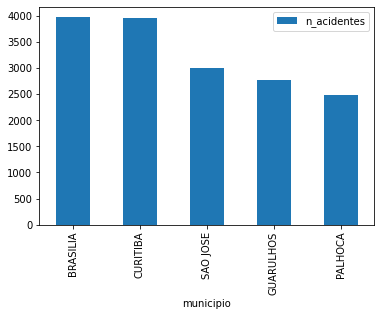

In [11]:
top5 = acid_munic.nlargest(5, "n_acidentes")
#display(top5)
top5.plot(kind='bar')

<div><font color='green'>(d) Foi gerada uma filtragem contando quantas linhas correspondem ao estado da Paraíba e que possuem algum número de feridos. Finalizando com um agrupamento da contagem das linhas, ou seja, de quantos acidentes ocorreram com vítimas feridas gravemente em 2019.</font></div>

In [12]:
filter_PB = pd.DataFrame(acidentes.loc[(acidentes['data'].dt.to_period('Y')=='2019') & (acidentes['uf'] == 'PB') & (acidentes['feridos_graves'] != 0)])
filter_PB.groupby('uf').agg(n_acid_feridos_graves=('feridos_graves', 'count'))

,n_acid_feridos_graves
uf,
PB,414


#### **3º Tarefa**

<div>Para cada indicação abaixo, construa um novo dataframe, salvando-o com a terminação .csv.<br>
(a) ranking de acidentes por estado para todos os anos (um só arquivo combinando a informação dos quatro anos);<br>
(b) acidentes por dia da semana para todos os anos (um só arquivo combinando a informação dos quatro anos).</div>

<div><font color='green'>(a) Para rankear a quantidade de acidentes por estado em todos os anos, realizei uma filtragem usando "groupby" contando os acidentes por estado sem restrição de ano. Em seguida, transformando-o em um novo DataFrame, adicionei a coluna "ranking" ao mesmo, utilizando o método "rank" e convertendo todo o resultado para inteiro. Por fim, filtrei os valores em ordem crescente.</font></div>

In [13]:
acid_total = acidentes.groupby(['uf']).agg(n_acidentes=('uf','count'))
rank_acidentes = pd.DataFrame(acid_total)
rank_acidentes['ranking'] = pd.DataFrame(rank_acidentes['n_acidentes'].rank(method='max', ascending=False)).astype(int)
rank_acidentes.sort_values(['ranking'], inplace=True)
rank_acidentes.to_csv('ranking_acidentes.csv', encoding='latin1', sep=';')
rank_acidentes

,n_acidentes,ranking
uf,,
MG,34483,1
SC,32034,2
PR,30185,3
RJ,17982,4
RS,17754,5
SP,17236,6
BA,13793,7
GO,13233,8
PE,10566,9


<div><font color='green'>(b) Para essa questão, utilizei do mesmo método que anteriormente, contando quantas vezes cada dia da semana se repete no DataFrame principal, transformando, em seguida, em um DataFrame.</font></div>

In [14]:
acid_total_dias = acidentes.groupby(['dia_semana']).agg(n_acidentes=('dia_semana','count'))
acid_dias = pd.DataFrame(acid_total_dias)
acid_dias.to_csv('qtd_acidentes_por_dia.csv', encoding='latin1', sep=';')
acid_dias

,n_acidentes
dia_semana,
domingo,43816
quarta-feira,33347
quinta-feira,34471
segunda-feira,35712
sexta-feira,40945
sábado,43872
terça-feira,32641


#### **4º Tarefa**

<div>Com relação a ocorrência dos acidentes, responda:<br>
(a) qual a causa mais frequente e a mais rara de acidentes registrados nos quatro anos?<br>
(b) qual a proporção de pessoas ilesas e de feridos graves por mês em cada um dos anos considerados? (proporção = numero de ilesos ou feridos graves/ número total de pessoas envolvidas no acidente);<br>
(c) mostre, reorganizando o conjunto de dados, se a pandemia conseguiu diminuir ou não a incidência de acidentes nas rodovias federais.</div>


<div><font color='green'>(a) Para essa questão, gerei uma filtragem simples contando a quantidade de cada ocorrência, atribui os resultados a duas variáveis e exibi ambos com a função "display".</font></div>

In [15]:
causa = acidentes.groupby('causa_acidente').agg(n_ocorrencias=('causa_acidente', 'count'))
causa_acid = pd.DataFrame(causa)
causa_acid.reset_index(level='causa_acidente', inplace=True)
max = causa_acid[causa_acid['n_ocorrencias'] == causa_acid['n_ocorrencias'].max()]
min = causa_acid[causa_acid['n_ocorrencias'] == causa_acid['n_ocorrencias'].min()]
display(max)
display(min)

,causa_acidente,n_ocorrencias
37,Falta de Atenção à Condução,73231


,causa_acidente,n_ocorrencias
76,Sinalização encoberta,3
78,Sistema de drenagem ineficiente,3


<div><font color='green'>(b) Foram reeunidos os dados de número de ilesos, feridos e pessoas envolvidas no acidente dentro de um só DataFrame. Adicionei as respectivas colunas de proporção para ilesos e feridos utilizando dos dados coletados anteriormente. Por fim, foi formatado resultado das colunas, já que estavam em float, para porcentagem. </font></div>

In [16]:
proporcao = acidentes.groupby(acidentes['data'].dt.to_period('M')).agg(n_acidentes=('id', 'count'),n_ilesos=('ilesos', 'sum'),n_feridos_graves=('feridos_graves', 'sum'), n_pessoas=('pessoas', 'sum'))
proporcao['prop_ilesos'] = proporcao['n_ilesos']/proporcao['n_pessoas']
proporcao['prop_feridos_graves'] = proporcao['n_feridos_graves']/proporcao['n_pessoas']
prop = pd.DataFrame(proporcao)
#exibindo apenas os 10 primeios itens para melhor visualização
(prop.loc[:,['n_pessoas','prop_ilesos', 'prop_feridos_graves']].head(10)).style.format({'prop_ilesos':'{:,.2%}'.format, 'prop_feridos_graves':'{:,.2%}'.format})

,n_pessoas,prop_ilesos,prop_feridos_graves
data,,,
2018-01,16665,51.33%,9.06%
2018-02,14047,49.83%,9.22%
2018-03,15110,48.15%,10.19%
2018-04,13230,43.02%,11.28%
2018-05,11489,42.22%,11.45%
2018-06,12870,42.51%,11.64%
2018-07,13618,43.75%,11.03%
2018-08,12776,42.71%,10.64%
2018-09,13027,42.07%,11.55%


<div><font color='green'>(c) Já que a pandemia se inciou, no Brasil, pós carnaval, mais precisamente no mês de março, decidi reunir o número de acidente do mês de março dos anos analisados neste projeto. Para isso, foi utilizada a função "loc", onde se obteve o intervalo do mês de março de cada ano. Após isso foi realizado o merge das filtragens com base no DataFrame de proporção utilizado na alternativa anterior. Por fim, foi gerado um gráfico de barras exibindo a diferença de número de acidentes de cada ano no mês de março antes, durante e pós pandemia.<br><br>
É possível assim, concluir, que o lockdown, consequente da pandemia da Covid-19, gerou uma diminuição significativa nos acidentes nas rodovias federais brasileiras.</font></div>

<AxesSubplot:title={'center':'acidentes por ano no mês de março - antes x durante pandemia'}, xlabel='ano'>

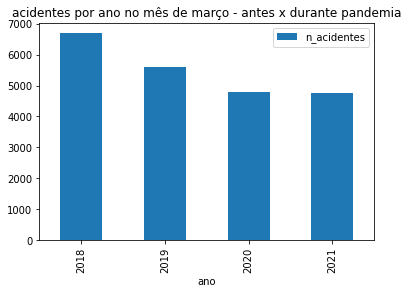

In [17]:
import math
x = prop.reset_index()
n2020 = x.loc[x['data'].between('2020-03', '2020-03')]
n2018 = x.loc[x['data'].between('2018-03', '2018-03')]
n2019 = x.loc[x['data'].between('2019-03', '2019-03')]
n2021 = x.loc[x['data'].between('2021-03', '2021-03')]
acid_anos_marco = pd.merge(n2018.merge(n2019, how="outer"), n2020.merge(n2021, how="outer"), how="outer")
acid_anos_marco['n_acidentes'] = acid_anos_marco['n_acidentes'].astype(int)
acid_anos_marco['ano'] = acid_anos_marco['data'].dt.year
plot_base = acid_anos_marco.loc[:,['ano', 'n_acidentes']]
plot_base.set_index('ano').plot(use_index=True, kind='bar', title='acidentes por ano no mês de março - antes x durante pandemia')
